# AM2061 Algorithm 4-2
## Cubic Spline Interpolation - Condition 2

We expand upon the Cubic Spline Interpolation Algorithm as seen in Algorithm 4.1.

Consider the clamped condition - **Condition 2**, $S'\left( x_0 \right) = f'\left( x_0 \right)$ and $S'\left( x_n \right) = f'\left( x_n \right)$. We solve a set of linear equations $Ax=b$ using **LU Decomposition** (Algorithm 3.4) to find $x$, the coefficients $c_j$:

\begin{gather}
\begin{bmatrix}
2h_0 & h_0 & 0 & \dots & \dots & \dots & 0 \\
h_0 & 2\left( h_0 + h_1 \right) & h_1 & \ddots &  &  & \vdots \\
0 & h_1 & 2\left( h_1 + h_2 \right) & h_2 & \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots &  &  & \ddots & h_{n-2} & 2\left( h_{n-2} + h_{n-1} \right) & h_{n-1} \\
0 & \dots & \dots & \dots & 0 & h_{n-1} & 2h_{n-1}
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
\vdots \\
\vdots \\
c_n
\end{bmatrix}
=
\begin{bmatrix}
\frac{3}{h_0} \left( a_1 - a_0 \right) - 3f'\left( x_0 \right) \\
\frac{3}{h_1} \left( a_2 - a_1 \right) - \frac{3}{h_0} \left( a_1 - a_0 \right) \\
\vdots \\
\vdots \\
\frac{3}{h_{n-1}} \left( a_n - a_{n-1} \right) - \frac{3}{h_{n-2}} \left( a_{n-1} - a_{n-2} \right) \\
3f'\left( x_n \right) - \frac{3}{h_{n-1}} \left( a_n - a_{n-1} \right)
\end{bmatrix}
\end{gather}

Where we let $f'\left( x_0 \right) \equiv FP0$ and $f'\left( x_n \right) \equiv FPN$. The formulae for the matrix components $b_0$ and $b_n$ are the only differing part of matrix $b$, these follow as derived in **Lecture 16**:

$$ b_0 = \frac{3}{h_0} \left( a_1 - a_0 \right) - 3 FP0 $$
$$ b_n = 3 FPN - \frac{3}{h_{n - 1}} \left( a_n - a_{n - 1} \right) $$

We follow much the same procedure as in Algorithm 4.1, with these changes.

A brief explanation is as follows:

* We are given all coefficients $a_j$, and the values of $FP0$ and $FPN$
* Find $h_j = x_{j+1} - x_j$
* Set the matrix components $b_0$ and $b_n$ as in the above equations
* We wish to solve $Ax=b$ as above by LU Decomposition to find $x$, and thus all coefficients $c_j$
  * Use similar procedure as in Algorithm 4.1
  * We solve $Lz=b$ giving $z$
  * We solve $Ux=z$ giving $x$
* We use the above equations to solve for the *coefficients* $b_j$
* We use the above equations to solve for the *coefficients* $d_j$

*Note the following notation in the pseudocode relating to lectures (where $b_i$ is part of $Ax=b$, not the coefficients):
$$ b_i \rightarrow \alpha_i $$
$$ u_{i-1,i} \rightarrow \mu_{i-1} $$
$$ l_{i,i} \rightarrow l_{i-1} $$
$$ l_{i,i-1} \rightarrow h_{i-1} $$*

The following is the pseudocode provided:
    
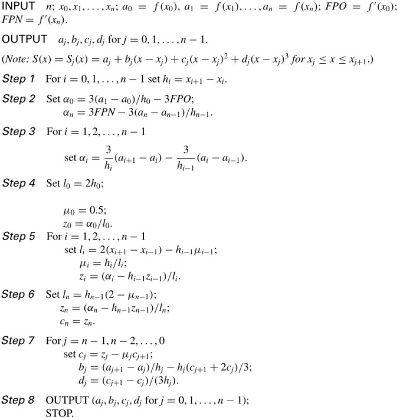

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the Example in **Lecture 15**, where we have points:

$$ \left( 1, 2 \right) $$
$$ \left( 2, 3 \right) $$
$$ \left( 3, 5 \right) $$

We will also assume for the sake of example that $FP0 = 2$ and $FPN = 5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3])
Y = np.array([2, 3, 5])

Now let us define the algorithm, we only need to pass in the arrays $X$ and $Y$.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def CubicSplineCondition2(X, Y, FP0, FPN):
    '''
    Usage:
        Takes a set of known datapoints and uses Cubic Spline Interpolation between them
    Inputs:
        X: array of known x-values
        Y: array of known y-values
        FP0: known slope at x_0
        FPN: known slope at x_n
    Outputs:
        a: array of coefficients
        b: array of coefficients
        c: array of coefficients
        d: array of coefficients
    '''
    # Copy Inputs for usage
    x = np.copy(X)
    y = np.copy(Y)
    # Get size n
    n = len(x)
    
    # Helper h
    h = np.zeros([n])
    # Coefficients: a, b, c, d
    a = y
    b = np.zeros([n])
    c = np.zeros([n])
    d = np.zeros([n])
    
    # Matrix l
    l = np.zeros([n])
    # Matrix mu
    mu = np.zeros([n])
    # Helper z
    z = np.zeros([n])
    # b in Ax=b, now called alpha
    alpha = np.zeros([n])
    
    # Step 1
    for i in range(0, n - 1):
        h[i] = x[i + 1] - x[i]
        
    # Step 2
    alpha[0] = 3 * (a[1] - a[0]) / h[0] - 3 * FP0
    alpha[n - 1] = 3 * FPN - 3 * (a[n - 1] - a[n - 2]) / h[n - 2]
        
    # Step 3
    for i in range(1, n - 1):
        alpha[i] = 3 * (a[i + 1] - a[i]) / h[i] - 3 * (a[i] - a[i - 1]) / h[i - 1] #subbing in
        
    # Step 4
    l[0] = 2 * h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]
    
    # Step 5
    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
        
    # Step 6
    l[n - 1] = h[n - 2] * (2 - mu[n - 2])
    z[n - 1] = (alpha[n - 1] - h[n - 2] * z[n - 2]) / l[n - 1]
    c[n - 1] = z[n - 1]
    
    # Step 7
    for j in range(n - 2, -1, -1): # from n - 2 to 0, check notation for n
        c[j] = z[j] - mu[j] * c[j + 1] # subbing in formulae
        b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        
    # Extra - Print results
    for i in range(n - 1):
        print("S" + str(i) + "(x) = " + str(a[i]) + " + " + \
              str(b[i]) + "(x-" + str(x[i]) + ") + " + \
              str(c[i]) + "(x-" + str(x[i]) + ")^2 + " + \
              str(d[i]) + "(x-" + str(x[i]) + ")^3")
        
    # Step 8
    return (a, b, c, d)

We can now test this algorithm for a solution, which will be returned as a tuple $(a, b, c, d)$:

In [3]:
CubicSplineCondition2(X, Y, 2, 5)

S0(x) = 2 + 2.0(x-1) + -1.5(x-1)^2 + 0.5000000000000001(x-1)^3
S1(x) = 3 + 0.5(x-2) + 2.220446049250313e-16(x-2)^2 + 1.5(x-2)^3


(array([2, 3, 5]),
 array([2. , 0.5, 0. ]),
 array([-1.50000000e+00,  2.22044605e-16,  4.50000000e+00]),
 array([0.5, 1.5, 0. ]))

Let us plot these:

S0(x) = 2 + 2.0(x-1) + -1.5(x-1)^2 + 0.5000000000000001(x-1)^3
S1(x) = 3 + 0.5(x-2) + 2.220446049250313e-16(x-2)^2 + 1.5(x-2)^3


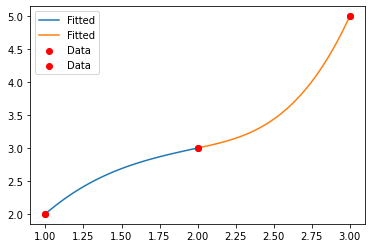

In [4]:
(a, b, c, d) = CubicSplineCondition2(X, Y, 2, 5)

for i in range(len(X) - 1): # Plotting all S on same plot
    Xs = np.linspace(X[i], X[i + 1], 50) # arbitray amount of points
    Ys = a[i] + b[i] * (Xs - X[i]) + c[i] * (Xs - X[i])**2 + d[i] * (Xs - X[i])**3 # create all S
    plt.plot(Xs, Ys, label = "Fitted", zorder = -1)
    plt.scatter(X, Y, label = "Data", color = "red")
    plt.legend()